
<h2><center><font color='black'>   Taking a Deep-Learning Dive with Keras </font></center></h2>

<img src='imgs/Deep_Dive_Keras_1.jpg' align='middle'/>

<img src='imgs/neuron1.png' align='middle'/>


<img src='imgs/linear1.png'/>

[Credits: Andrej Karpathy, Conv Neural Net class ](http://cs231n.github.io/linear-classify/)


<img src='imgs/linear_2_a.png'/>
<img src='imgs/cats_a.png'/>



<img src='imgs/linear2.png'/>


$$ Softmax:   f_j(z)={{{e^{z_j}}\above 1pt\sum_k e^{z_k}}}$$

$$ Cross Entropy:   L_i= -\sum_j t_j log(f_j(z))$$      
( Cross Entropy ~ Negative log probability for the right answer)


<img src='imgs/linear3.png'/>

<img src='imgs/linear4.png'/>

<img src='imgs/mnist_wt.png' align='middle'/>

<img src='imgs/xor.png' align='middle'/>

<img src='imgs/xor2.png'/>

<img src='imgs/convex.png'/>

<img src='imgs/non_convex.png'/>

<img src='imgs/backprop.png'/>
Credits: [mattmazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)

Let's focus on w5 how can we update this weight?

$$net_{o1}= h_{1}*w_5 + h_2*w_6+b2$$  

$$out_{o1}= {{1}\above 1pt (1+e^{-net_{o1}})}$$

$$E_{total}= 1/2(target-out)^2$$

How do we calculate : $${dE_{total}\above 1pt dw_5} ?$$ 



$${dE_{total}\above 1pt dout_{o1}}=2*1/2(target_{o1}-out_{o1})$$

$${dout_{o1}\above 1pt dnet_{o1}}=out_{o1}*(1-out{o1})$$

$${dnet_{o1}\above 1pt dw_{5}}=h_{1}$$


$${dE_{total}\above 1pt dw_5} = {dE_{total}\above 1pt dout_{o1}}{dout_{o1}\above 1pt dnet_{o1}}{dnet_{o1}\above 1pt dw_{5}}$$ 

<h1><center><font color='#F87217'> KERAS  </font></center></h1>

<h4><center><font color='black'> High-Level Deep Learning Library for Theano & Tensorflow  </font></center></h4>
 


Keras was developed to allow for fast deep-learning prototyping through the use of: 
 - user-friendliness
 - modularity
 - extensibility
 
Keras via Theano vs Keras via Tensorflow ? 
  - Comparable performance (for now), but Tensorflow will quickly pull ahead
  - We will start with Theano today  (launch your notebook via):
  
 ```
 KERAS_BACKEND=theano jupyter notebook
 ```

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.utils.np_utils import to_categorical

from IPython.display import SVG
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import sys

In [1]:
import keras
keras.backend.set_image_data_format('channels_first')

Using TensorFlow backend.


### Let's get some data

In [5]:
sns.set_style('white')

iris=datasets.load_iris()
X=iris.data
y=iris.target

data=pd.DataFrame(X)
data['target']=y

In [6]:
data['name']=data.target.astype('str').replace({'0':'setosa','1':'versicolor','2':'virginica'})

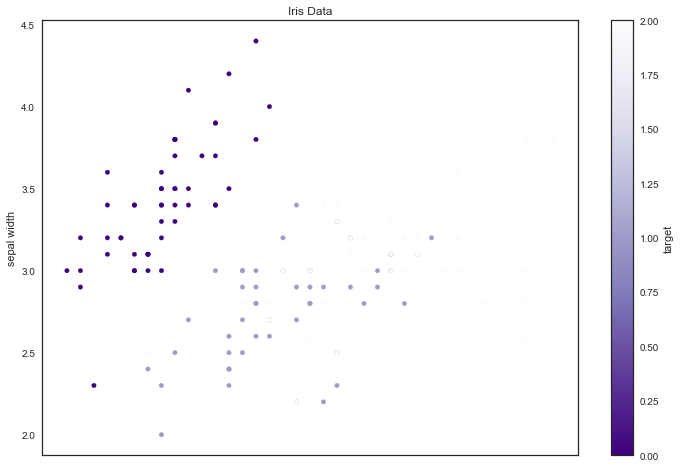

In [30]:
#ax=subplot(1,1,1)

plt.figure(figsize=(10,7));
ax=data.plot(kind='scatter',x=0,y=1,c='target',legend=False,figsize=(12,8),colormap="Purples_r");
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Iris Data');

## `Keras` Models
- The core objects in `Keras` are `Models` and `Layers`
- `Models` set up the container for your network
- `Layers` fill in the architecture (connections, unit types, activation functions, etc)
- The 2 options for `Models`:
  - `Sequential`: The basic one we'll focus on
  - Function API: Specify complex uncommon models
  
### The Sequential Model
- Allow you to stack all sorts of layers in your network
- Canvas on which you paint your beautiful network!

In [8]:
model=Sequential()  # Let's define our first Model.. 
model.add(Dense(units=3,input_dim=4))  # output: # classes,input: # of features
model.add(Activation("softmax"))

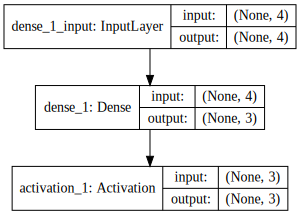

In [9]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [10]:
# encode class values to integers ~ one hot encoder
encoder=LabelEncoder()
encoder.fit(y)
enc_y=encoder.transform(y)
one_hot_y=to_categorical(enc_y)
one_hot_y[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [11]:
np.random.seed(123)  # reproducibility 

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.33, random_state=42)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 0s 2ms/step - loss: 5.4906 - acc: 0.3100 - val_loss: 4.9311 - val_acc: 0.3800
Epoch 2/10
100/100 [==============================] - 0s 216us/step - loss: 5.4033 - acc: 0.3100 - val_loss: 4.8539 - val_acc: 0.3800
Epoch 3/10
100/100 [==============================] - 0s 188us/step - loss: 5.3216 - acc: 0.3100 - val_loss: 4.7771 - val_acc: 0.3800
Epoch 4/10
100/100 [==============================] - 0s 170us/step - loss: 5.2374 - acc: 0.3100 - val_loss: 4.7025 - val_acc: 0.3800
Epoch 5/10
100/100 [==============================] - 0s 208us/step - loss: 5.1575 - acc: 0.3100 - val_loss: 4.6269 - val_acc: 0.3800
Epoch 6/10
100/100 [==============================] - 0s 176us/step - loss: 5.0791 - acc: 0.3100 - val_loss: 4.5520 - val_acc: 0.3800
Epoch 7/10
100/100 [==============================] - 0s 184us/step - loss: 4.9970 - acc: 0.3100 - val_loss: 4.4801 - val_acc: 0.3800
Epoch 8/10
100/100 

###  So wait, what did we just do ?


### Let's try it again..

But first : let's do a quick install
https://github.com/fchollet/hualos

& run the app:

```
python api.py
```

In [32]:
model=Sequential()   # take two! 
model.add(Dense(units=64,input_dim=4))  # Note: we are making our network wider,
model.add(Activation("relu"))
model.add(Dense(units=32)) # We are making our network longer :)
model.add(Activation("relu"))
model.add(Dense(units=3))
model.add(Activation("softmax"))

In [33]:
np.random.seed(123)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

   

model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[cb_a,cb_b])

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 1.0566 - acc: 0.3500 - val_loss: 0.9981 - val_acc: 0.3200
Epoch 2/10
100/100 [==============================] - 0s 362us/step - loss: 0.9793 - acc: 0.3400 - val_loss: 0.9595 - val_acc: 0.3800
Epoch 3/10
100/100 [==============================] - 0s 317us/step - loss: 0.9568 - acc: 0.3800 - val_loss: 0.9170 - val_acc: 0.5400
Epoch 4/10
100/100 [==============================] - 0s 295us/step - loss: 0.9095 - acc: 0.5700 - val_loss: 0.8734 - val_acc: 0.7600
Epoch 5/10
100/100 [==============================] - 0s 333us/step - loss: 0.8782 - acc: 0.7100 - val_loss: 0.8486 - val_acc: 0.8200
Epoch 6/10
100/100 [==============================] - 0s 287us/step - loss: 0.8422 - acc: 0.8300 - val_loss: 0.8048 - val_acc: 0.9600
Epoch 7/10
100/100 [==============================] - 0s 261us/step - loss: 0.8018 - acc: 0.9600 - val_loss: 0.7560 - val_acc: 0.9800
Epoch 8/10
100/100 

###  What can be gained by making the network wider & deeper?   

 -  A sufficiently wide neural net can approximate any reasonable function
 -  A deep network can be quite good at generalization
 
 <img src='imgs/VGG.png'/>

##  Code-Along
#### Objective: 
- Continue working with the Iris dataset, build another model that improves the accuracy further.
- Experiment with differnt [optimizers!](https://keras.io/optimizers/)
- Try to get > .95 accuracy.


## A word about optimization: 
Keras will perform parameter updates via the optimization on a batch by batch basis.

**SGD**: Learning rate is constant (default setting)   

- we can set decay: to develop a time-based **decay**

- **Nesterov** = True

- we can set **momentum:**  some fraction of the previous update is added to the current update, so that repeated updates in a particular direction compound (allows us to move faster in some direction)





- **Adagrad**:  Weights that receive smaller or less frequent updates will have an increased learning rate (more frequently updated parameters will receive a smaller learning rate increase)    

- **Adam (Adaptive Moment Estimation): Adagrad + Momentum **    

[all things optimizers](http://ruder.io/optimizing-gradient-descent/)

[learn from your loss functions](http://cs231n.github.io/neural-networks-3/#loss)